In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading working data
dataset1 = pd.read_excel("New_Data.xls")
dataset = dataset1.iloc[:,1:len(dataset1)]

,Total,Percent
Age (day),103,0.1
Fine Aggregate (component 7)(kg in a m^3 mixture),103,0.1
Coarse Aggregate (component 6)(kg in a m^3 mixture),103,0.1
Superplasticizer (component 5)(kg in a m^3 mixture),103,0.1
Water (component 4)(kg in a m^3 mixture),103,0.1


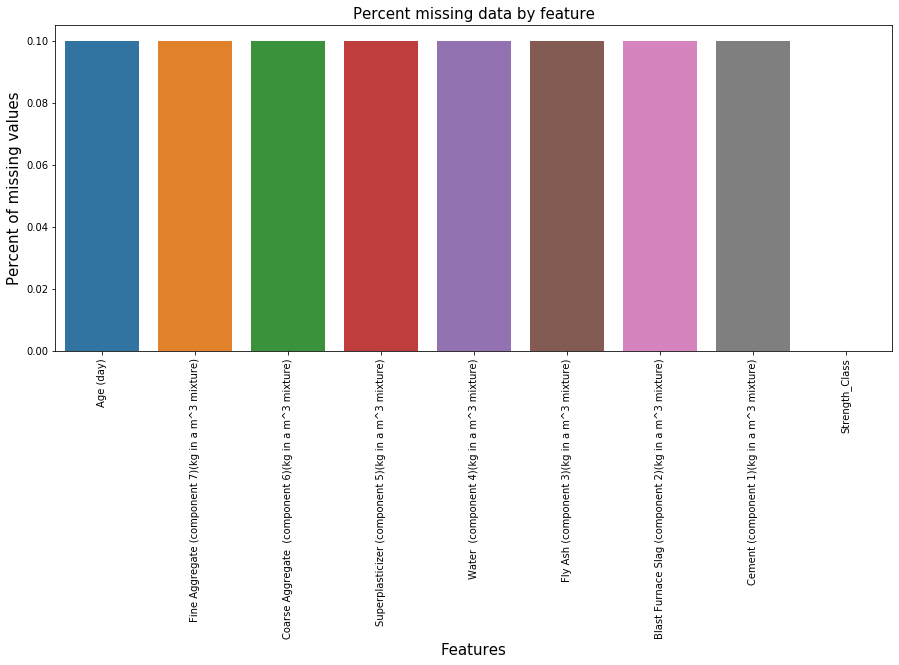

In [3]:
#Calculating percentage of missing data points corresponding to each feature
total = dataset.isnull().sum().sort_values(ascending=False)
percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 9 Text xticklabel objects>)

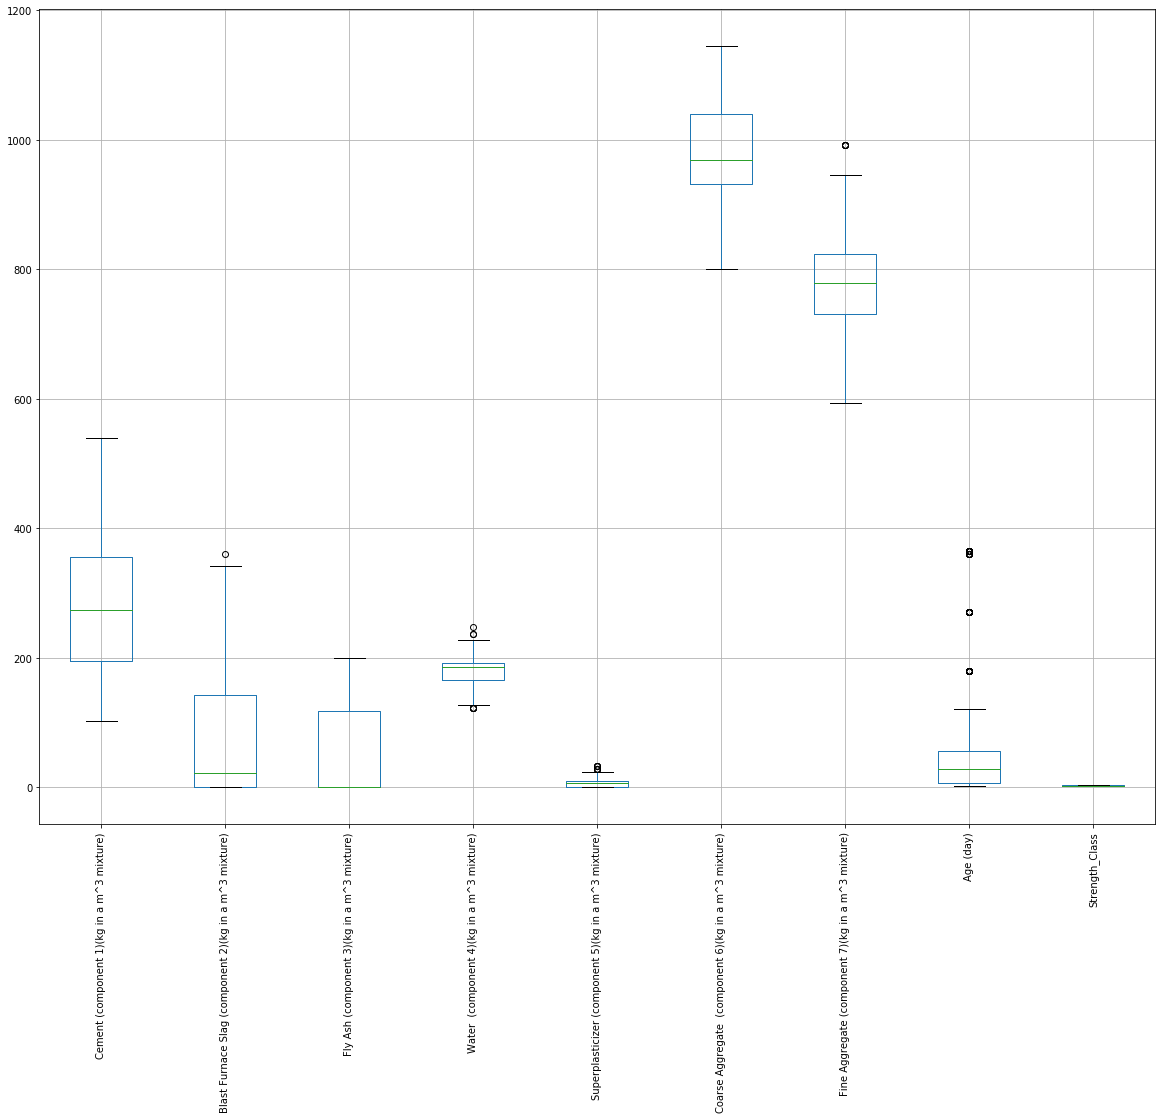

In [4]:
#Box-plot for each feature to check for outliers
boxplot = dataset.boxplot(figsize = (20,15))
plt.xticks(rotation='90')

In [5]:
#Renaming feature names
new_data = dataset.rename(columns = {"Cement (component 1)(kg in a m^3 mixture)": "cement", 
                                  "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":"blast", 
                                  "Fly Ash (component 3)(kg in a m^3 mixture)": "flyash",
                                    "Water  (component 4)(kg in a m^3 mixture)": "water",
                                    "Superplasticizer (component 5)(kg in a m^3 mixture)": "plast",
                                    "Coarse Aggregate  (component 6)(kg in a m^3 mixture)": "coarse",
                                    "Fine Aggregate (component 7)(kg in a m^3 mixture)": "fine",
                                    "Age (day)": "age",
                                    "Strength_Class":"strength"}) 

In [6]:
#Filling the missing data points corresponding to each feature with suitable technique
new_data.cement.fillna(new_data.cement.mean(),inplace=True)
new_data.blast.fillna(method ='bfill', inplace = True)
new_data.flyash.fillna(method ='bfill', inplace = True)
new_data.water.fillna(new_data.water.median(),inplace=True)
new_data.plast.fillna(method ='bfill', inplace = True)
new_data.coarse.fillna(new_data.coarse.mean(),inplace=True)
new_data.fine.fillna(new_data.fine.median(),inplace=True)
new_data.age.fillna(method ='bfill', inplace = True)

In [7]:
#Saving the workings as Working data
new_data.to_excel('Working_Data.xls')